In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [2]:
train_path = "/Users/trevorpeyton/Downloads/LBNL_Follower_1VMSU_Test/LBNL_Follower_1VMSU_Test1"
test_path = "/Users/trevorpeyton/Downloads/LBNL_Follower_1VMSU_Test/LBNL_Follower_1VMSU_Test2"
train, test = [], []

for file in os.listdir(train_path):
    if file.endswith(".csv"):
        trial = pd.read_csv(os.path.join(train_path, file), usecols=[3, 4], names=["time", "v"])
        vals = trial.v.to_numpy()
        train.append(vals[::6000])
        
for file in os.listdir(test_path):
    if file.endswith(".csv"):
        trial = pd.read_csv(os.path.join(test_path, file), usecols=[3, 4], names=["time", "v"])
        vals = trial.v.to_numpy()
        test.append(vals[::6000])

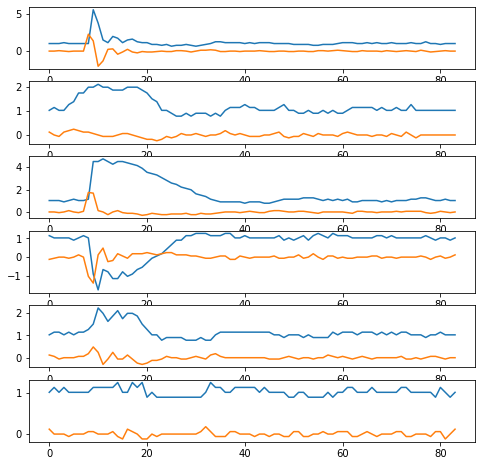

In [3]:
example_class_indexes = [ 0,  6, 17, 21, 23, 35]
fig, axs = plt.subplots(len(example_class_indexes), figsize=(8, 8))
for i, n in enumerate(example_class_indexes):
    axs[i].plot(train[n][:])
    axs[i].plot(np.gradient(train[n][:]))

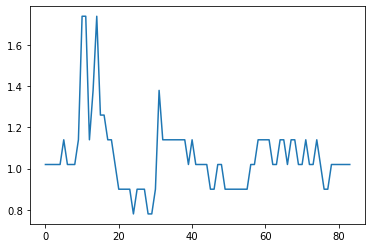

In [80]:
plt.plot(test[1])

In [121]:
train = np.array(train)
test = np.array(test)
train_y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 3,
                    0, 4, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 4, 5, 0, 0, 0, 2, 0, 0, 2, 5,
                    0, 0, 2, 2, 2, 0])
test_y = np.array([0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 3,
                   1, 5])

In [132]:
#get indices and counts for each class
np.unique(train_y, return_index=True, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 0,  6, 17, 21, 23, 35]),
 array([28,  6, 11,  1,  2,  2]))

In [123]:
model = Sequential()
model.add(Conv1D(16, 10, activation="relu", input_shape=train[..., None].shape[1:]))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

In [124]:
model.fit(train[:len(train_y)][..., None], train_y, epochs=25, verbose=0, batch_size=4)

In [125]:
model.evaluate(test[:len(test_y)][..., None], test_y)

1/1 [==============================] - 0s 58ms/step - loss: 0.3576 - accuracy: 0.8800


[0.3576211929321289, 0.8799999952316284]

Predicted: 0, Expected: 0 (correct)
correct plot:


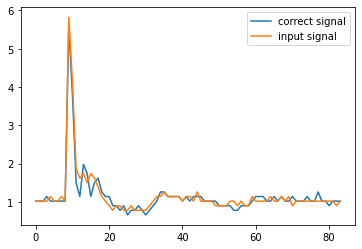

In [143]:
i = 0
t = np.argmax(model.predict(np.array(test[i])[None, :, None]))
print(f"Predicted: {t}, Expected: {test_y[i]} ({'correct' if t == test_y[i] else 'incorrect'})")
print("correct plot:")
plt.plot(np.array(train[np.where(train_y==test_y[i])[0][0]]), label="correct signal")
plt.plot(np.array(test[i]), label="input signal")
plt.legend()
plt.show()
if t != test_y[i]:
    print("Incorrect plot")
    plt.plot(np.array(train[np.where(train_y==t)[0][0]]), label="predicted signal")
    plt.plot(np.array(test[i]), label="input signal")
    plt.legend()
    plt.show()